In [4]:
import tensorflow as tf 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_regression 
from sklearn.preprocessing import StandardScaler

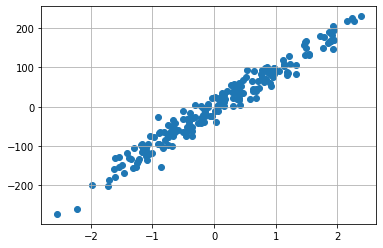

In [5]:
xvals, yvals = make_regression(n_samples = 200, n_features = 1, n_targets = 1, noise = 20, random_state = 0)
xvals, yvals = tf.constant(xvals), tf.constant(yvals)
plt.scatter(xvals, yvals)
plt.grid(True)
plt.show()

In [6]:
class MODEL(tf.keras.Model):

    def __init__(self):
        super(MODEL,self).__init__()
        self.fc1 = tf.keras.layers.Dense(100)
        self.fc2 = tf.keras.layers.Dense(50)
        self.fc3 = tf.keras.layers.Dense(1)

    def forward(self,x):
        x = tf.nn.relu(self.fc1(x))
        x = tf.nn.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [7]:
def plot_line(model, xvals, yvals):
    plt.scatter(xvals,yvals)
    plt.scatter(xvals,model.forward(xvals), c='r')
    plt.grid(True)
    plt.show()

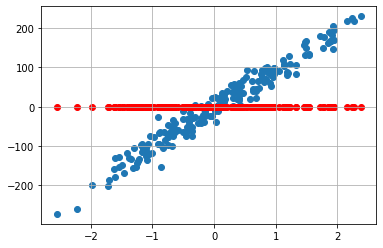

In [8]:
model = MODEL()
plot_line(model, xvals, yvals)

Epoch 0 | Loss : 10158.9345703125
Epoch 50 | Loss : 9761.185546875
Epoch 100 | Loss : 8354.90234375
Epoch 150 | Loss : 5283.2705078125
Epoch 200 | Loss : 2035.73974609375
Epoch 250 | Loss : 817.09765625
Epoch 300 | Loss : 619.7965087890625
Epoch 350 | Loss : 599.9638061523438
Epoch 400 | Loss : 595.4249267578125
Epoch 450 | Loss : 590.0309448242188
Epoch 500 | Loss : 582.5609130859375
Epoch 550 | Loss : 574.5477294921875
Epoch 600 | Loss : 564.1544189453125
Epoch 650 | Loss : 550.4749145507812
Epoch 700 | Loss : 530.2374267578125
Epoch 750 | Loss : 505.3704833984375
Epoch 800 | Loss : 479.4952392578125
Epoch 850 | Loss : 453.2320251464844
Epoch 900 | Loss : 429.0878601074219
Epoch 950 | Loss : 409.5743713378906


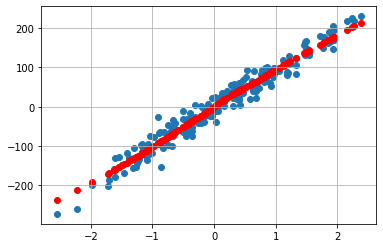

In [9]:
epochs = 1000
lr = 0.01
opt = tf.keras.optimizers.Adam()
loss_fn = tf.keras.losses.MeanSquaredError()

for epoch in range(epochs):
    with tf.GradientTape() as tape :
        yhat = model.forward(xvals)
        loss = loss_fn(yvals, yhat)

    grads = tape.gradient(loss, model.trainable_weights)
    opt.apply_gradients(zip(grads, model.trainable_weights))

    if epoch % (epochs/20) == 0 :
        print(f'Epoch {epoch} | Loss : {loss.numpy()}')

plot_line(model,xvals,yvals)